In [1]:
# Laura Guo
# 22 June 2020
# This is the simple maze example discussed in the 6/17/20 meeting.

# SET-UP, VARIABLES ------------------------

import random

maze_len = 30
agent_index = random.randint(0, maze_len - 1) # current position of the agent in the maze
value = [0] * maze_len # value function, all start with 0
gamma = 1 # used in the value function
previous_index = -1

reward_index = random.randint(0, maze_len - 1) # location of the reward
reward = [-1] * maze_len # reward function
reward[reward_index] = 0
maze = [''] * maze_len # visual representation of where the agent and reward are
maze[reward_index] = 'R'

# FUNCTIONS --------------------------------

# policy function - agent determines if it will move left or right given the current agent location; returns the new index
def pi(s):
	if value[right(s)] > value[left(s)]:
		new_index = right(s)
	elif value[right(s)] < value[left(s)]:
		new_index = left(s)
	else:
		if random.random() < 0.5:
			new_index = left(s)
		else:
			new_index = right(s)
			
	return new_index

# returns the delta value given the current and previous indices
def delta(s, p):
	global value
	value[p] += (reward[p] + gamma * value[s]) - value[p]

# returns the delta value for the goal scenario given the agent's current index
def delta_goal(s):
	global value
	value[s] += reward[s] - value[s]

# returns the index to the right of the given position
def right(s):
	if s != (maze_len - 1):
		return s + 1
	else:
		return 0
	
# returns the index to the left of the given position
def left(s):
	global agent_index
	if s != 0:
		return s - 1
	else:
		return maze_len - 1
	
# TRAINING ---------------------------------

for episode_num in range(1000):
	#print('Episode ', episode_num)
	
	while agent_index != reward_index:
	    # outputting information about maze and functions
		#maze[agent_index] = 'A'
		#print('Maze\t\t',  maze)
		#maze[agent_index] = ' '
		#print('Value function\t', value)
		
		previous_index = agent_index
		agent_index = pi(agent_index) # making a move
		delta(agent_index, previous_index)

	delta_goal(agent_index)
	#print('Value function\t', value)
	#print('----------------------')
	
	agent_index = random.randint(0, maze_len - 1) # placing the agent at a random location for the next episode

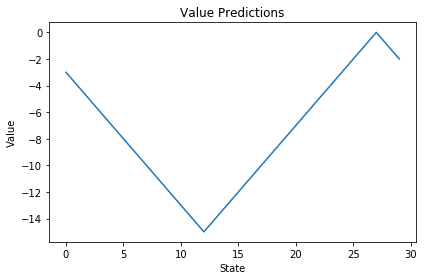

In [2]:
import matplotlib.pyplot as plt

plt.figure(1)

plt.plot(value)
plt.title('Value Predictions')
plt.xlabel('State')
plt.ylabel('Value')

plt.tight_layout()
plt.show()